In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import newton
from scipy.interpolate import interp1d
from scipy.integrate import solve_bvp, solve_ivp
from adjustText import adjust_text

plt.style.use('bmh')

In [2]:
rho_max = 0.2
rho_cr = 0.0278
V_cr = 20
V_max = 40
W_max = 5
Q_max = 0.556

alpha = (Q_max/(rho_max - rho_cr)**2) - (W_max/(rho_max - rho_cr))


def Q_e(rho):
        
    val_1 = lambda rho: rho*(V_max - rho/rho_cr * (V_max - V_cr))
    val_2 = lambda rho: W_max*(rho_max - rho) + alpha*(rho_max - rho)**2
    
    output = np.piecewise(rho, [(0 <= rho) & (rho < rho_cr), (rho_cr <= rho) & (rho<= rho_max)], [val_1, val_2])
    return output

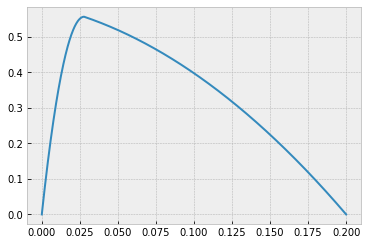

In [3]:
rho = np.linspace(0, rho_max, 1000)
plt.plot(rho, Q_e(rho))

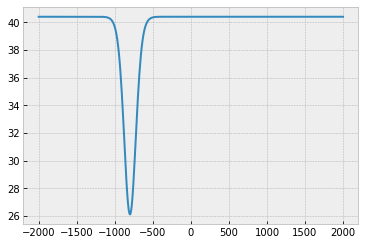

In [4]:

x = np.linspace(-2000, 2000, 4000//10)
Q_0 = lambda x: np.exp(-((x+800)**2)/20_000)/2+0.1
u_0 = lambda x: 1/(np.exp(-((x+800)**2)/20_000)/2+0.1)

plt.plot(x, 40.8*(1-Q_0(x)**(2)))

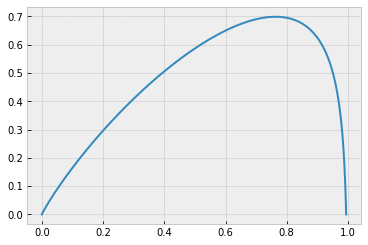

In [5]:
rho_max = 1/7.5
u_max = 20
beta = 12
gamma_1 = 1/5
gamma_2 = 1/10

h = lambda rho: beta * ((rho/rho_max)**gamma_1/((1-(rho/rho_max))**gamma_2))

U = lambda rho: u_max - h(rho)

def Q(rho): 
    
    if np.isclose(rho, rho_max):
        return 0
    
    output = rho * U(rho)
    return output

zero = np.real(newton(U,rho_max-1e-4))
rhos = np.linspace(0, zero, 1_000)
Q_to_plot = [Q(rho) for rho in rhos]
plt.plot(rhos/rho_max, Q_to_plot)
plt.show()

In [6]:
def Q_prime(rho):
    rho_bar = rho/rho_max
    output_1 = U(rho)
    output_2 = (gamma_1 * rho_bar**gamma_1)/((1-rho_bar)**gamma_2)
    output_3 = (gamma_2 * rho_bar**gamma_1)/(rho * rho_max * ((1-rho_bar)**(gamma_2+1)))
    output_4 = beta * (output_2 + output_3)
    output = output_1 + output_4
    return output

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


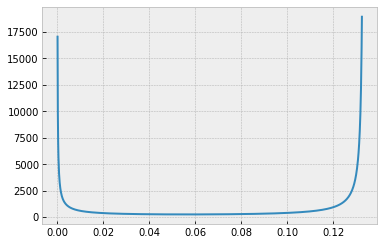

In [7]:
Q_p_to_plot = [Q_prime(rho) for rho in rhos]
plt.plot(rhos, Q_p_to_plot)
plt.show()

In [8]:
Q_p_inv = lambda x: Q_prime(x)-600
newton(Q_p_inv, 0.01)

0.009960575449567735

In [9]:
Q_prime(zero)

18946.947188802646

#####################################

In [10]:
gamma = 1/2
beta = 8
u_max = 20
rho_max = 1/7.5

def h_(rho):
    output = beta * (rho /(rho_max - rho))**gamma
    return output

def U_(rho):
    return u_max - h_(rho)

def Q_(rho):
    if np.isclose(rho, rho_max):
        return 0.0
    
    output = rho * U_(rho)
    return output

def U_prime_(rho):
    output = gamma * rho_max * h_(rho) * (rho/(rho_max - rho))
    return output

def U_inv_(z):
    output = rho_max * (((u_max-z)/beta)**(1/gamma)/(1 + ((u_max-z)/beta)**(1/gamma)))
    return output

def Q_prime_(rho):
    output = U_(rho) + gamma * rho_max * h_(rho) * (rho**2)/(rho_max - rho)
    return output

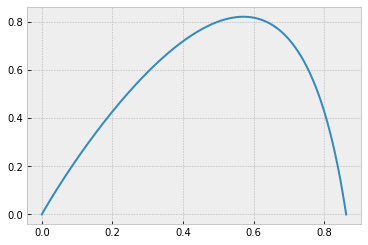

In [11]:
zero = np.real(newton(U_,rho_max-1e-4))
rhos = np.linspace(0, zero, 1_000)
Q_to_plot = [Q_(rho) for rho in rhos]
plt.plot(rhos/rho_max, Q_to_plot)
plt.show()

In [12]:
Q_prime(zero)

460.29475471328453

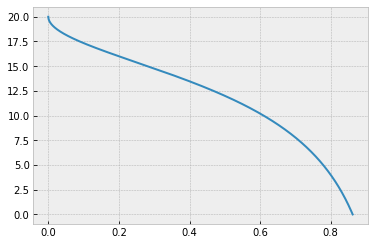

In [13]:
plt.plot(rhos/rho_max, U_(rhos))
plt.show()

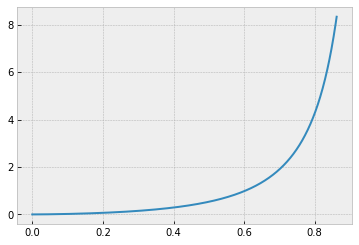

In [14]:
plt.plot(rhos/rho_max, U_prime_(rhos))
plt.show()

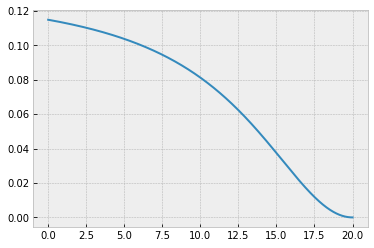

In [15]:
zs = np.linspace(0, 20, 1000)
plt.plot(zs, U_inv_(zs))
plt.show()

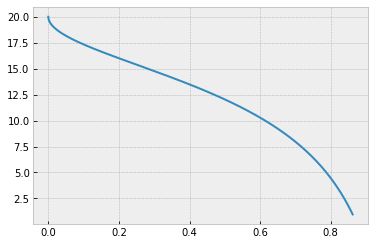

In [16]:
plt.plot(rhos/rho_max, Q_prime_(rhos))
plt.show()

In [17]:
def Q_p_inv_points_(z):
    z = float(z)
    Q_to_inv = lambda x: Q_prime_(x)-z
    
    if 19.7 < z <= u_max:
        rho = np.real(newton(Q_to_inv, 0.0))
        return rho
    
    rho = np.real(newton(Q_to_inv, 0.8*rho_max))
    return rho

In [18]:
zs = np.linspace(0.96, u_max, 50)
Q_p_inv_to_poly = [Q_p_inv_points_(z) for z in zs]

Q_inv_ = interp1d(zs, Q_p_inv_to_poly)


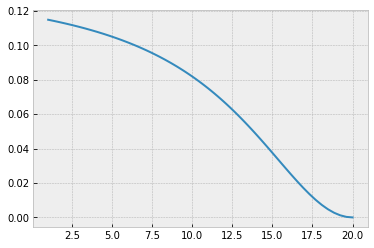

In [19]:
z_to_plot = np.linspace(1., 20, 100)
plt.plot(z_to_plot, Q_inv_(z_to_plot))
plt.show()

In [20]:
def Q_0_3(x, U):
    
    # Gaussiana centrada en 1500
    rho_0 = (np.exp(-((x-400)**2)/20_000)/6+0.3)*rho_max #np.exp(-x**2/(2*2.7**2))/(2.7*np.sqrt(2*np.pi))
    
    # Menor velocidad en mayor densidad
    u_0 = 1/rho_0
    
    # y inicial en funcion de u y rho
    y_0 = rho_0 * (u_0 - U(rho_0))
    
    # Vector con codicion
    Q_0_ = np.zeros([2, len(x)])
    Q_0_[0] = rho_0
    Q_0_[1] = y_0
    
    return Q_0_


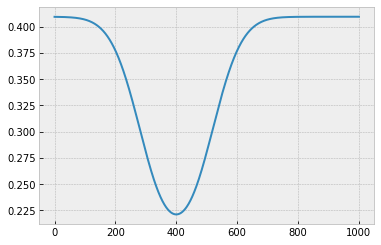

In [21]:
x = np.linspace(0, 1000, 1000)
plt.plot(x, Q_0_3(x, U_)[1])

###################################

In [73]:
gamma = 1/2
beta = 8
u_max = 20
rho_max = 1/7.5
c = 0.078 * u_max * rho_max
b = 1/3
l = 1/10
tau = 5

def h(rho):
    output = beta * (rho /(rho_max - rho))**gamma
    return output

def h_prime(rho):
    output =  beta * gamma * (rho /(rho_max - rho))**(gamma-1) * rho_max / ((rho_max - rho)**2)
    return output

def g(y):
    output = np.sqrt(1 + ((y-b)/l)**2 )
    return output

def Q_e(rho):
    output = c * (g(0) + (((g(1) - g(0)) * rho/rho_max)) - g(rho/rho_max))
    return output



def g_prime(y):
    output = (1/l**2) * ((y-b)/ np.sqrt(1 + ((y-b)/l)**2)) 
    return output

def Q_prime(rho):
    output = c * ( ((g(1) - g(0))/rho_max) - (g_prime(rho/rho_max)/rho_max))
    return output

#def U(rho):
#    return Q(rho)/rho

#def U_prime(rho):
#    output = (Q_prime(rho)*rho - Q(rho))/(rho**2)
#    return output


# Velocidad de equilibrio
def U(rho):
    output = Q_e(rho)/(np.sqrt((rho**2 + 1e-5**2)))
    return output


# Derivada de la velocidad de equilibrio
def U_prime(rho):
    output = (Q_prime(rho) - U(rho))/np.sqrt((rho**2 + 1e-5**2))
    return output


# Inversa de U
def U_inv_points(z):
    z = float(z)
    U_to_inv = lambda x: U(x)-z
    
    rho = np.real(newton(U_to_inv, 0.5*rho_max))
    return rho

zs_U = np.linspace(u_max, 0, 50)
U_inv_to_poly = [U_inv_points(z) for z in zs_U]

U_inv = interp1d(zs_U, U_inv_to_poly)


# Inversa de la derivada de Q
def Q_p_inv_points(z):
    z = float(z)
    Q_to_inv = lambda x: Q_prime(x)-z
    
    rho = np.real(newton(Q_to_inv, 0.3*rho_max))
    return rho

rhos = np.linspace(0, rho_max-1e-5, 100_000)
zs_Q = np.linspace(Q_prime(rhos).min(), u_max, 50)
Q_p_inv_to_poly = [Q_p_inv_points(z) for z in zs_Q]

Q_p_inv = interp1d(zs_Q, Q_p_inv_to_poly)

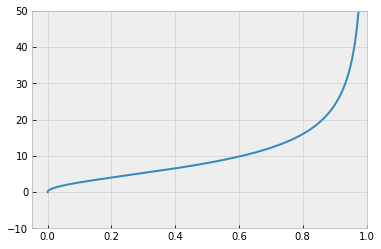

In [62]:
plt.plot(rhos/rho_max, h(rhos))
plt.xlim(-0.05, 1)
plt.ylim(-10, 50)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in power
  from ipykernel import kernelapp as app


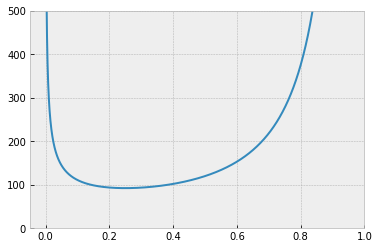

In [5]:
plt.plot(rhos/rho_max, h_prime(rhos))
plt.xlim(-0.05, 1)
plt.ylim(0, 500)
plt.show()

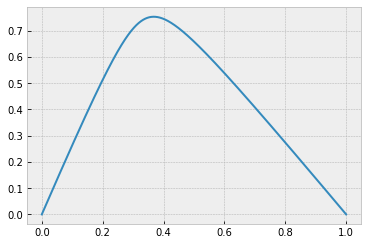

In [6]:
plt.plot(rhos/rho_max, Q(rhos))
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


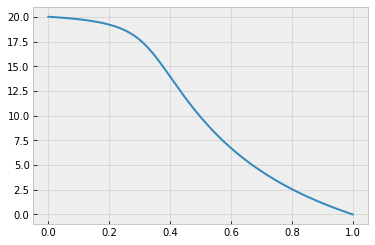

In [7]:
plt.plot(rhos/rho_max, U(rhos))
plt.show()

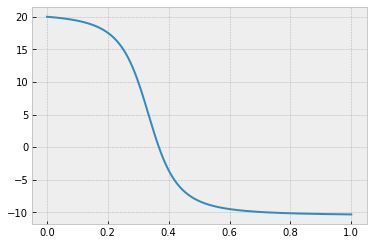

In [8]:
plt.plot(rhos/rho_max, Q_prime(rhos))
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


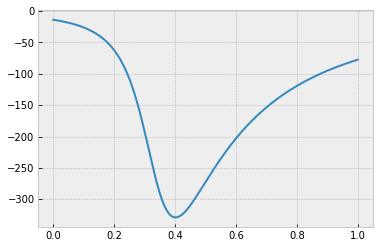

In [9]:
plt.plot(rhos/rho_max, U_prime(rhos))
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in power
  from ipykernel import kernelapp as app


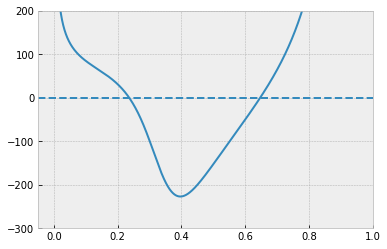

In [10]:
plt.plot(rhos/rho_max, U_prime(rhos) + h_prime(rhos))
plt.xlim(-0.05, 1)
plt.ylim(-300, 200)
plt.hlines(0, -0.05, 1, ls="--")
plt.show()

In [11]:
def U_inv_points(z):
    z = float(z)
    U_to_inv = lambda x: U(x)-z
    
    rho = np.real(newton(U_to_inv, 0.5*rho_max))
    return rho

zs = np.linspace(u_max, 0, 50)
U_inv_to_poly = [U_inv_points(z) for z in zs]

U_inv = interp1d(zs, U_inv_to_poly)

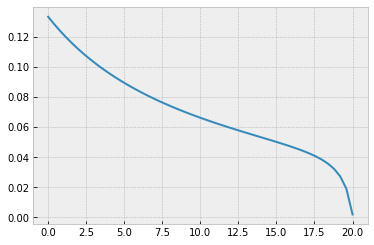

In [12]:
z_to_plot = np.linspace(u_max, 0, 100)
plt.plot(z_to_plot, U_inv(z_to_plot))
plt.show()

In [13]:
def Q_p_inv_points(z):
    z = float(z)
    Q_to_inv = lambda x: Q_prime(x)-z
    
    rho = np.real(newton(Q_to_inv, 0.3*rho_max))
    return rho


zs = np.linspace(Q_prime(rhos).min(), u_max, 50)
Q_p_inv_to_poly = [Q_p_inv_points(z) for z in zs]

Q_p_inv = interp1d(zs, Q_p_inv_to_poly)

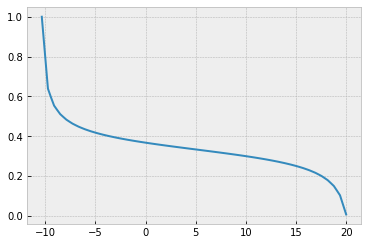

In [14]:
z_to_plot = np.linspace(Q_prime(rhos).min(), 20, 100)
plt.plot(z_to_plot, Q_p_inv(z_to_plot)/rho_max)
plt.show()

## Construcción de jamitones

In [1017]:
rho_s = 0.37 * rho_max # Está normalizado

m = rho_s**2 * h_prime(rho_s)
s = U(rho_s) - rho_s*h_prime(rho_s)

rho_plus, u_plus = 0.5*rho_max, 12

# Condiciones de rankine-hugoniot
def alpha_plus(rho_plus, u_plus):
    output = s * rho_plus - rho_plus * u_plus
    return output

def beta_plus(rho_plus, u_plus):
    output_1 = s * rho_plus * (u_plus + h(rho_plus))
    output_2 = -rho_plus * u_plus**2
    output_3 = -rho_plus * u_plus * h(rho_plus)
    return output_1 + output_2 + output_3

def gamma_plus(rho_plus, u_plus):
    output = beta_plus(rho_plus, u_plus)/alpha_plus(rho_plus, u_plus)
    return output

def find_rho_minus(rho_plus, u_plus):
    rho_fun = lambda rho: rho * (s - gamma_plus(rho_plus, u_plus) + h(rho)) - alpha_plus(rho_plus, u_plus)
    rho_minus = newton(rho_fun, 0)
    return rho_minus

def find_u_minus(rho_plus, u_plus, rho_minus):
    output = gamma_plus(rho_plus, u_plus) - h(rho_minus)
    return output

In [1018]:
rho_minus = find_rho_minus(rho_plus, u_plus)
u_minus = find_u_minus(rho_plus, u_plus, rho_minus)
rho_minus/rho_max, u_minus

(0.1202138965365209, 17.04281308930704)

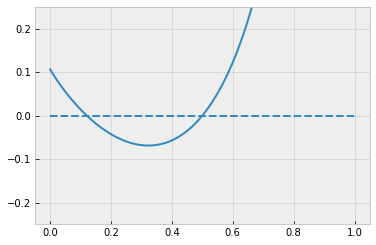

In [266]:
rho_fun = lambda rho: rho * (s - gamma_plus(rho_plus, u_plus) + h(rho)) - alpha_plus(rho_plus, u_plus)
plt.plot(rhos/rho_max, rho_fun(rhos))
plt.ylim(-0.25, 0.25)
plt.hlines(0, 0, 1, ls="--")

In [267]:
def jam_EDO(x, u):
    rho = m / (u - s)
    output_1 = (u - s) * (U(rho) - u)
    output_2 =  (u - s)**2 - m * h_prime(rho)
    return output_1/(output_2 * tau)

# Condicion de borde
def bc(ua, ub):
    return ua - ub - u_plus + u_minus

x_to_solve = np.linspace(0, 50, 1000)
u_to_solve = np.zeros((1, x_to_solve.size))

u_to_solve[-1] = u_minus

sol = solve_bvp(jam_EDO, bc, x_to_solve, u_to_solve)

In [268]:
u_sol = sol.y[0]
rho_sol = m/(u_sol - s)

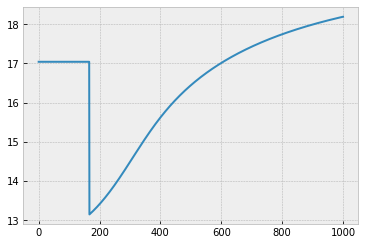

In [269]:
u_cte = np.ones(200)*u_minus
u_final = np.append(u_cte, u_sol)
x_final = np.linspace(0, 1000, 1200)
plt.plot(x_final, u_final)

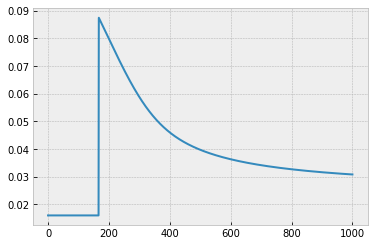

In [270]:
rho_cte = np.ones(200)*rho_minus
rho_final = np.append(rho_cte, rho_sol)
plt.plot(x_final, rho_final)

## Variables lagrangeanas

In [101]:
# Elección valores sónicos
rho_s = 0.385 * rho_max #0.37 * rho_max
v_s = 1/rho_s # Se necesita rho_s normalizado

m_bar = -h_bar_prime(v_s)
s_bar = U_bar(v_s) - m_bar * v_s

# Imprime parámetros
print("Velocidad jamiton: ", s_bar)
print("m= ", m_bar)

# Verifica que exista jamiton
jam_exs = U_prime(rho_s) + h_prime(rho_s) < 0
print("¿Existe jamiton? ",  jam_exs)

Velocidad jamiton:  9.481672023990026
m=  0.2641661389145878
¿Existe jamiton?  True


In [102]:
# Mayor velocidad de onda posible
rho_s_zero = newton(lambda rho: U_prime(rho) + h_prime(rho), 0.2*rho_max)
v_s_zero = 1/rho_s_zero
m_max = -h_bar_prime(v_s_zero)
s_max = U_bar(v_s_zero) - m_max * v_s_zero
s_max

15.949186618873384

In [96]:
def w_uwu(v, m, s):
    output = U_bar(v) - (m * v + s)
    return output

rho_s_values = np.linspace(0.3, 0.64, 20) * rho_max
for rho_s in rho_s_values:
    print("rho_s: ", round(rho_s/rho_max, 3))
    v_s = 1/rho_s
    m = -h_bar_prime(v_s)
    s = U_bar(v_s) - m * v_s
    w_ms = lambda v: w_uwu(v, m, s)
    v_M = newton(w_ms, 50)
    print("Intervalo de v_-: ({v_s}, {v_M})".format(v_s=v_s, v_M=v_M))
    print("Largo intervalo: ", round(v_M-v_s, 3))

rho_s:  0.3
Intervalo de v_-: (25.0, 33.89743480416909)
Largo intervalo:  8.897
rho_s:  0.318
Intervalo de v_-: (23.592715231788084, 34.71222395265202)
Largo intervalo:  11.12
rho_s:  0.336
Intervalo de v_-: (22.335423197492165, 35.50715072410676)
Largo intervalo:  13.172
rho_s:  0.354
Intervalo de v_-: (21.205357142857146, 36.18034020040498)
Largo intervalo:  14.975
rho_s:  0.372
Intervalo de v_-: (20.18413597733711, 36.6332258851598)
Largo intervalo:  16.449
rho_s:  0.389
Intervalo de v_-: (19.256756756756758, 36.797574401280755)
Largo intervalo:  17.541
rho_s:  0.407
Intervalo de v_-: (18.410852713178294, 36.647235319353996)
Largo intervalo:  18.236
rho_s:  0.425
Intervalo de v_-: (17.636138613861387, 36.19265085402333)
Largo intervalo:  18.557
rho_s:  0.443
Intervalo de v_-: (16.92399049881235, 35.46730565111467)
Largo intervalo:  18.543
rho_s:  0.461
Intervalo de v_-: (16.267123287671232, 34.514689031206245)
Largo intervalo:  18.248
rho_s:  0.479
Intervalo de v_-: (15.659340659340

In [98]:
# Funciones del modelo
def h_bar(v):
    return h(1/v)

def h_bar_prime(v):
    output = -h_prime(1/v)/v**2 
    return output

def U_bar(v):
    return U(1/v)

def w_v(v, m, s):
    output = U_bar(v) - (m * v + s)
    return output

def r(v, m):
    output = m * h_bar(v) + m**2 * v
    return output

def r_prime(v, m):
    output = m * h_bar_prime(v) + m**2
    return output

def ode_jam_v(x, v, tau, m, s):
    output = w_v(v, m, s)/(r_prime(v, m) * v * tau)
    return output

def ode_jam_v_eta(eta, v, m, s):
    output = w_v(v, m, s)/(r_prime(v, m) * v)
    return output

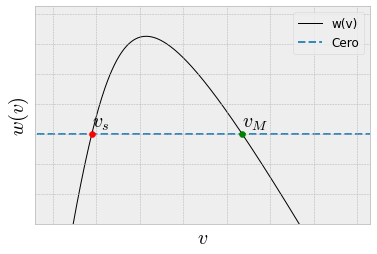

In [104]:
v_f = 100
texts = []
v_to_plot = np.linspace(8, v_f, 1000)#15, 50, 1000)#
plt.plot(v_to_plot, w_v(v_to_plot, m_bar, s_bar), label="w(v)", zorder=0, color="black", lw=1)
#plt.xlim(20, 37.5)
#plt.ylim(-1, 0.5)

plt.hlines(0, 1, v_f, ls="--", label="Cero", zorder=1)
plt.scatter(v_s, w_v(v_s, m_bar, s_bar), color="red", zorder=2)
texts += [plt.annotate(r"$v_s$", (v_s, w_v(v_s, m_bar, s_bar)), fontsize=20)]

# jamiton maximal
v_M = newton(lambda v: w_v(v, m_bar, s_bar), 40)
plt.scatter(v_M, w_v(v_M, m_bar, s_bar), color="green", zorder=2)
texts += [plt.annotate(r"$v_M$", (v_M, w_v(v_M, m_bar, s_bar)), fontsize=20)]

plt.xlabel(r"$v$", fontsize=20)
plt.ylabel(r"$w(v)$", fontsize=20)
plt.legend(fontsize=12)

plt.xlim(v_s/1.5, 1.4*v_M)
plt.ylim(w_v(v_s, m_bar, s_bar)-1.5, np.max(w_v(v_to_plot, m_bar, s_bar))+0.5)
adjust_text(texts, only_move={'points':'y', 'texts':'y'})
plt.tick_params(left = False , labelleft = False, 
                labelbottom = False, bottom = False)
#plt.savefig("Jamitones/w_rho_{}.png".format(rho_s/rho_max))
plt.show()

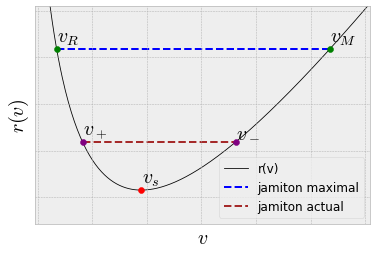

In [107]:
texts = []
plt.plot(v_to_plot, r(v_to_plot, m_bar), zorder=0, color="black", label="r(v)", lw = 0.8)

#plt.xlim(10, 40)
#plt.ylim(2.5, 3.5)

#plt.xlim(27.5, 32.5)
#plt.ylim(0.788, 0.795)

r_min = r(v_s, m_bar)
r_max = r(v_M, m_bar)

# Velocidad sonica
plt.scatter(v_s, r_min, color="red", zorder=2)
texts += [plt.annotate(r"$v_s$", (v_s, r_min), fontsize=20)]

# jamiton maximal
plt.scatter(v_M, r_max, color="green", zorder=2)
texts += [plt.annotate(r"$v_M$", (v_M, r_max), fontsize=20)]

v_R = newton(lambda v: r(v, m_bar) - r_max, 10)#15)
plt.scatter(v_R, r(v_R, m_bar), color="green", zorder=2)
texts += [plt.annotate(r"$v_R$", (v_R, r(v_R, m_bar)), fontsize=20)]

# Linea de jamiton maximal
plt.hlines(r_max, v_R, v_M, color="blue", ls="--", label="jamiton maximal", zorder=1)

# Jamiton actual
v_minus = (v_M + v_s)/2#(v_M + v_s)/1.77#31
r_minus = r(v_minus, m_bar)
v_plus = newton(lambda v: r(v, m_bar) - r_minus, 8)
r_plus = r(v_plus, m_bar)

plt.scatter(v_minus, r_minus, color="purple", zorder=2)
texts += [plt.annotate(r"$v_-$", (v_minus, r_minus), fontsize=20)]

plt.scatter(v_plus, r_plus, color="purple", zorder=2)
texts += [plt.annotate(r"$v_+$", (v_plus, r_plus), fontsize=20)]

# Linea de jamiton actual
plt.hlines(r_minus, v_plus, v_minus, color="brown", ls="--", label="jamiton actual", zorder=1)

plt.xlabel(r"$v$", fontsize=20)
plt.ylabel(r"$r(v)$", fontsize=20)

plt.xlim(v_R/1.2, v_M*1.1)
plt.ylim(r(v_s, m_bar)/1.05, r(v_R, m_bar)*1.05)

adjust_text(texts)

plt.tick_params(left = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.legend(fontsize=12)

#plt.savefig("Jamitones/r_rho_{}.png".format(rho_s/rho_max))
plt.show()

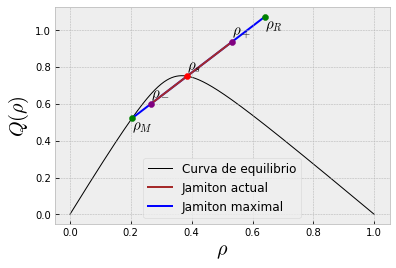

In [110]:
texts = []
# Diagrama fundamental
plt.plot(rhos/rho_max, Q(rhos), zorder=0, color="black", label="Curva de equilibrio", lw=1)
#plt.xlim(0.01, 0.1)
#plt.ylim(0.2, 1.5)

rho_plus = 1/v_plus
rho_minus = 1/v_minus
rho_M = 1/v_M
rho_R = 1/v_R

rho_s = 1/v_s

plt.scatter(rho_s/rho_max, Q_e(rho_s), color="red", zorder=3)
texts += [plt.annotate(r"$\rho_s$", (rho_s/rho_max, Q_e(rho_s)), fontsize=15)]

plt.scatter(rho_plus/rho_max, m_bar + s_bar * rho_plus, color="purple", zorder=3)
texts += [plt.annotate(r"$\rho_+$", (rho_plus/rho_max, m_bar + s_bar * rho_plus), fontsize=15)]
plt.scatter(rho_minus/rho_max, m_bar + s_bar * rho_minus, color="purple", zorder=3)
texts += [plt.annotate(r"$\rho_-$", (rho_minus/rho_max, m_bar + s_bar * rho_minus), fontsize=15)]

plt.scatter(rho_M/rho_max, m_bar + s_bar * rho_M, color="green", zorder=3)
texts += [plt.annotate(r"$\rho_M$", (rho_M/rho_max, m_bar + s_bar * rho_M), fontsize=15)]
plt.scatter(rho_R/rho_max,  m_bar + s_bar * rho_R, color="green", zorder=3)
texts += [plt.annotate(r"$\rho_R$", (rho_R/rho_max,  m_bar + s_bar * rho_R), fontsize=15)]

plt.plot([rho_plus/rho_max, rho_minus/rho_max], [m_bar + s_bar * rho_plus, m_bar + s_bar * rho_minus], color="brown", ls="-", 
         zorder=2, label="Jamiton actual")
plt.plot([rho_M/rho_max, rho_R/rho_max], [m_bar + s_bar * rho_M, m_bar + s_bar * rho_R], color="blue", ls="-", 
         zorder=1, label="Jamiton maximal")

plt.ylabel(r"$Q(\rho)$", fontsize=20)
plt.xlabel(r"$\rho$", fontsize=20)
plt.legend(fontsize=12)
#plt.tick_params(left = False , labelleft = False , 
#                labelbottom = False, bottom = False) 
adjust_text(texts)

#plt.savefig("Jamitones/Q_rho_{}.png".format(rho_s/rho_max))
plt.show()

In [116]:
# Resuelve EDO
t_f = 100
sol_v = solve_ivp(ode_jam_v, (0, t_f), [v_R], t_eval=np.linspace(0, t_f, 10_000), args=[tau, m_bar, s_bar], dense_output=True)

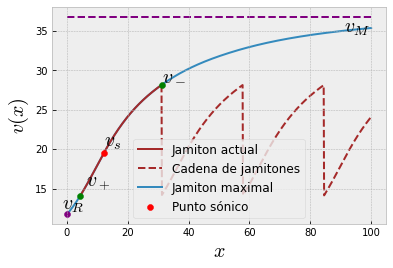

In [117]:
# Encuentra xs
x_minus = newton(lambda v: sol_v.sol(v)[0] - v_minus, 30)
x_plus = newton(lambda v: sol_v.sol(v)[0] - v_plus, 0)
x_s = newton(lambda v: sol_v.sol(v)[0] - v_s, 0)
x_to_plot = sol_v.t
x_to_per = np.linspace(x_minus, sol_v.t[-1], 500)

# Jamiton actual
x_jam = np.linspace(x_plus, x_minus, 500)
v_jam = sol_v.sol(x_jam)[0]

# Cadena de jamitones
def v_per(x):
    interval = x_plus - x_minus
    return sol_v.sol((x - x_minus) % interval + x_minus)[0]

texts = []
plt.plot(x_jam, v_jam, zorder=1, label="Jamiton actual", color="brown")
plt.plot(x_to_per, v_per(x_to_per), zorder=0, color="brown", ls="--", label="Cadena de jamitones")

plt.scatter(x_plus, sol_v.sol(x_plus)[0], zorder=2, color="green")
texts += [plt.annotate(r"$v_+$", (x_plus, sol_v.sol(x_plus)[0]), fontsize=20)]
plt.scatter(x_minus, sol_v.sol(x_minus)[0], zorder=2, color="green")
texts += [plt.annotate(r"$v_-$", (x_minus, sol_v.sol(x_minus)[0]), fontsize=20)]
plt.scatter(x_s, v_s, zorder=2, color="red", label="Punto sónico")
texts += [plt.annotate(r"$v_s$", (x_s, v_s), fontsize=20)]


# Jamiton maximal
plt.plot(x_to_plot, sol_v.y[0], zorder=0, label="Jamiton maximal")
plt.scatter(0, v_R, color="purple")
texts += [plt.annotate(r"$v_R$", (0, v_R), fontsize=20)]
plt.hlines(v_M, 0, t_f, color="purple", zorder=0, ls="--")
texts += [plt.annotate(r"$v_M$", (t_f, v_M), fontsize=20)]

#plt.xlim(-5, 42)
#plt.ylim(10, 40)
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel(r"$v(x)$", fontsize=20)
plt.legend(fontsize=12)
adjust_text(texts)

#plt.savefig("Jamitones/v_rho_{}.png".format(rho_s/rho_max))
plt.show()

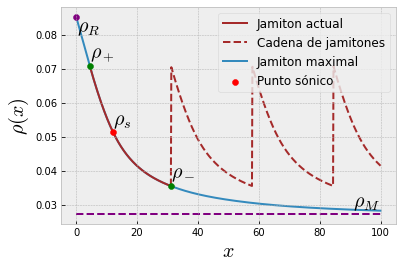

In [118]:
# Define densidad
sol_rho = lambda x: 1/sol_v.sol(x)[0]

# Jamiton actual
rho_jam = sol_rho(x_jam)
rho_y = 1/sol_v.y[0]

# Cadena de jamitones
def rho_per(x):
    interval = x_plus - x_minus
    return sol_rho((x - x_minus) % interval + x_minus)

texts = []
plt.plot(x_jam, rho_jam, zorder=1, label="Jamiton actual", color="brown")
plt.plot(x_to_per, rho_per(x_to_per), zorder=0, color="brown", ls="--", label="Cadena de jamitones")

plt.scatter(x_plus, sol_rho(x_plus), zorder=2, color="green")
texts += [plt.annotate(r"$\rho_+$", (x_plus, sol_rho(x_plus)), fontsize=20)]
plt.scatter(x_minus, sol_rho(x_minus), zorder=2, color="green")
texts += [plt.annotate(r"$\rho_-$", (x_minus, sol_rho(x_minus)), fontsize=20)]
plt.scatter(x_s, rho_s, zorder=2, color="red", label="Punto sónico")
texts += [plt.annotate(r"$\rho_s$", (x_s, rho_s), fontsize=20)]

# Jamiton maximal
plt.plot(x_to_plot, rho_y, zorder=0, label="Jamiton maximal")
plt.scatter(0, rho_R, color="purple")
texts += [plt.annotate(r"$\rho_R$", (0, rho_R), fontsize=20)]
plt.hlines(rho_M, 0, t_f, color="purple", zorder=0, ls="--")
texts += [plt.annotate(r"$\rho_M$", (t_f, rho_M), fontsize=20)]

plt.xlabel(r"$x$", fontsize=20)
plt.ylabel(r"$\rho(x)$", fontsize=20)
plt.legend(fontsize=12)
adjust_text(texts)

#plt.savefig("Jamitones/rho_rho_{}.png".format(rho_s/rho_max))
plt.show()

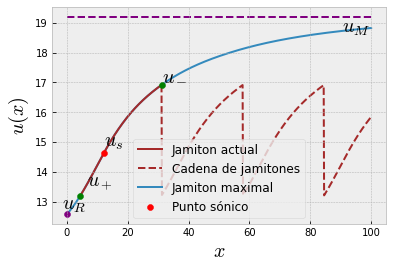

In [119]:
# Define velocidad
sol_u = lambda x: (m_bar/sol_rho(x)) + s_bar

# Jamiton actual
u_jam = sol_u(x_jam)
u_y = (m_bar/rho_y) + s_bar
u_s = (m_bar/rho_s) + s_bar
u_R = (m_bar/rho_R) + s_bar
u_M = (m_bar/rho_M) + s_bar

# Cadena de jamitones
def u_per(x):
    interval = x_plus - x_minus
    return sol_u((x - x_minus) % interval + x_minus)

texts = []
plt.plot(x_jam, u_jam, zorder=1, label="Jamiton actual", color="brown")
plt.plot(x_to_per, u_per(x_to_per), zorder=0, color="brown", ls="--", label="Cadena de jamitones")

plt.scatter(x_plus, sol_u(x_plus), zorder=2, color="green")
texts += [plt.annotate(r"$u_+$", (x_plus, sol_u(x_plus)), fontsize=20)]
plt.scatter(x_minus, sol_u(x_minus), zorder=2, color="green")
texts += [plt.annotate(r"$u_-$", (x_minus, sol_u(x_minus)), fontsize=20)]
plt.scatter(x_s, u_s, zorder=2, color="red", label="Punto sónico")
texts += [plt.annotate(r"$u_s$", (x_s, u_s), fontsize=20)]

# Jamiton maximal
plt.plot(x_to_plot, u_y, zorder=0, label="Jamiton maximal")
plt.scatter(0, u_R, color="purple")
texts += [plt.annotate(r"$u_R$", (0, u_R), fontsize=20)]
plt.hlines(u_M, 0, t_f, color="purple", zorder=0, ls="--")
texts += [plt.annotate(r"$u_M$", (t_f, u_M), fontsize=20)]

plt.xlabel(r"$x$", fontsize=20)
plt.ylabel(r"$u(x)$", fontsize=20)
plt.legend(fontsize=12)
adjust_text(texts)

#plt.savefig("Jamitones/u_rho_{}.png".format(rho_s/rho_max))
plt.show()

In [67]:
# Funciones del modelo
def h_bar(v):
    return h(1/v)

def h_bar_prime(v):
    output = -h_prime(1/v)/v**2 
    return output

def U_bar(v):
    return U(1/v)

def w_v(v, m, s):
    output = U_bar(v) - (m * v + s)
    return output

def r(v, m):
    output = m * h_bar(v) + m**2 * v
    return output

def r_prime(v, m):
    output = m * h_bar_prime(v) + m**2
    return output

def ode_jam_v(x, v, tau, m, s):
    output = w_v(v, m, s)/(r_prime(v, m) * v * tau)
    return output

def ode_jam_v_eta(eta, v, m, s):
    output = w_v(v, m, s)/(r_prime(v, m) * v)
    return output

In [148]:
# Transforma v a rho
def v_to_rho(v):
    rho = 1/v
    return rho

# Transforma rho a u
def rho_to_u(rho, m, s):
    u = (m/rho) + s
    return u


def jam_gen(rho_s, v_minus, tau):
    rho_s *= rho_max
    v_s = 1/rho_s

    values_v = {}
    values_rho = {}
    values_u = {}

    # Parámetros del jamiton
    m = -h_bar_prime(v_s)
    s = U_bar(v_s) - m * v_s

    # Existencia jamiton
    jam_exs = U_prime(v_to_rho(v_s)) + h_prime(v_to_rho(v_s)) < 0
    if not jam_exs:
        print("No existe jamiton, pruebe otro valor de rho_s")
        pass

    # Jamiton maximal
    v_M = newton(lambda v: w_v(v, m, s), 40)
    v_R = newton(lambda v: r(v, m) - r(v_M, m), 10)

    # Jamiton actual
    v_plus = newton(lambda v: r(v, m) - r(v_minus, m), 8)

    # Guarda valores de v
    values_v["v_s"] = v_s
    values_v["v_M"] = v_M
    values_v["v_R"] = v_R
    values_v["v_minus"] = v_minus
    values_v["v_plus"] = v_plus

    # Guarda valores de rho
    values_rho["rho_s"] = v_to_rho(v_s)
    values_rho["rho_M"] = v_to_rho(v_M)
    values_rho["rho_R"] = v_to_rho(v_R)
    values_rho["rho_minus"] = v_to_rho(v_minus)
    values_rho["rho_plus"] = v_to_rho(v_plus)

    # Guarda valores de u
    values_u["u_s"] = rho_to_u(values_rho["rho_s"], m, s)
    values_u["u_M"] = rho_to_u(values_rho["rho_M"], m, s)
    values_u["u_R"] = rho_to_u(values_rho["rho_R"], m, s)
    values_u["u_minus"] = rho_to_u(values_rho["rho_minus"], m, s)
    values_u["u_plus"] = rho_to_u(values_rho["rho_plus"], m, s)

    # Solucion EDO
    t_f = 6_000
    sol_v = solve_ivp(ode_jam_v, (0, t_f), [v_R], t_eval=np.linspace(0, t_f, 10_000), args=[tau, m, s], dense_output=True)
    sol_rho = lambda x: v_to_rho(sol_v.sol(x)[0])
    sol_u = lambda x: rho_to_u(sol_rho(x), m, s)
    
    return values_v, values_rho, values_u, sol_v, sol_rho, sol_u, m, s

In [152]:
rho_s_1 = 0.515
rho_s_2 = 0.551
v_minus = 20
tau = 5
x_init = 90
values_v_1, values_rho_1, values_u_1, sol_v_1, sol_rho_1, sol_u_1, m_1, s_1 = jam_gen(rho_s_1, v_minus, tau)
values_v_2, values_rho_2, values_u_2, sol_v_2, sol_rho_2, sol_u_2, m_2, s_2 = jam_gen(rho_s_2, v_minus, tau)

x_minus_1 = newton(lambda x: sol_v_1.sol(x)[0] - v_minus, x_init)
x_plus_1 = newton(lambda x: sol_v_1.sol(x)[0] -  values_v_1["v_plus"], 0)

x_minus_2 = newton(lambda x: sol_v_2.sol(x)[0] - v_minus, x_init)
x_plus_2 = newton(lambda x: sol_v_2.sol(x)[0] -  values_v_2["v_plus"], 0)

In [153]:
x_minus_1, x_minus_2

(114.32593185667145, 223.7006151023466)

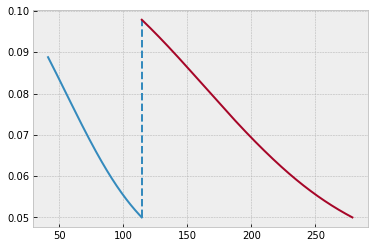

In [163]:
x_to_plot_1 = np.linspace(x_plus_1, x_minus_1, 1000)
x_to_plot_2 = np.linspace(x_plus_2, x_minus_2, 1000)

plt.plot(x_to_plot_1, sol_rho_1(x_to_plot_1))
plt.plot(x_to_plot_2+(x_minus_1-x_plus_2), sol_rho_2(x_to_plot_2))
plt.vlines(x_to_plot_1[-1], sol_rho_1(x_to_plot_1[-1]), sol_rho_2(x_to_plot_2[0]), ls="--")
plt.show()

In [181]:
x_minus_2

223.7006151023466

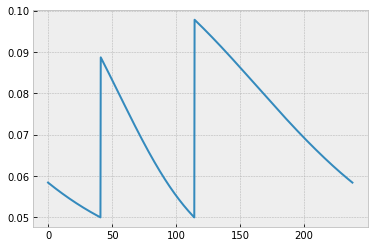

In [190]:
x_to_plot = np.linspace(0, x_minus_2+(x_minus_1 - x_plus_2) - x_plus_1, 1000)

def sol_final(x):
    if x_plus_1 <= x and x <= x_minus_1:
        return sol_rho_1(x)
    
    elif x_plus_2 <= x - (x_minus_1 - x_plus_2) and x - (x_minus_1 - x_plus_2) <= x_minus_2:
        return sol_rho_2(x-(x_minus_1 - x_plus_2))
sol_final = np.vectorize(sol_final)

def sol_per(x):
    interval = x_minus_2+(x_minus_1 - x_plus_2) - x_plus_1
    x_per = (x - x_plus_1) % interval + x_plus_1
    return sol_final(x_per)


plt.plot(x_to_plot, sol_per(x_to_plot))

In [186]:
sol_final(x_to_plot[-1])

array(None, dtype=object)

### Solución analítica

In [191]:
def ode_jam_v_eta(eta, v, m, s):
    output = w_v(v, m, s)/(r_prime(v, m) * v)
    return output

In [206]:
rho_s_test = 0.64
v_minus_test = 13
tau = 5

values_v_test, values_rho_test, values_u_test, sol_v_test, sol_rho_test, sol_u_test, m_test, s_test = jam_gen(rho_s_test, v_minus_test, tau)
v_R_test = values_v_test["v_R"]
sol_v_eta_test = solve_ivp(ode_jam_v_eta, (0, 6_000), [v_R_test], t_eval=np.linspace(0, 6000, 10_000), args=[m_test, s_test], dense_output=True)
sol_rho_eta_test = lambda eta: v_to_rho(sol_v_eta_test.sol(eta)[0])
sol_u_eta_test = lambda eta: rho_to_u(sol_rho_eta_test(eta), m_test, s_test)

eta_minus_test = newton(lambda x: sol_v_eta_test.sol(x)[0] - v_minus_test, 250)
eta_plus_test = newton(lambda x: sol_v_eta_test.sol(x)[0] -  values_v_test["v_plus"], 0)

In [273]:
def teo_rho_per(x, t, s):
    eta = (x - s*t)/tau
    interval = eta_minus_test - eta_plus_test
    eta_per = (eta - eta_plus_test) % interval + eta_plus_test
    
    return sol_rho_eta(eta_per)

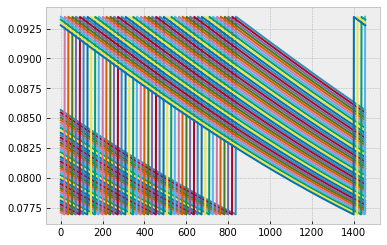

In [274]:
x_minus_test = eta_minus_test * tau
x_plus_test = eta_plus_test * tau
x_to_plot = np.linspace(0, x_minus_test - x_plus_test, 1000)

for t in range(0, 100, 2):
    plt.plot(x_to_plot, teo_rho_per(x_to_plot, t, s_test))

plt.show()

In [212]:
x_minus_test = eta_minus_test * tau
x_plus_test = eta_plus_test * tau
x_to_plot_test = np.linspace(x_plus_test, x_minus_test, 1000)

eta_to_plot_test = np.linspace(eta_plus_test, eta_minus_test, 1000)